In [16]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import numpy as np

In [17]:
#THe following script will import the data
Tg = []
Longg = []
Latg = []


fo=open("Trackwithvideo.txt","r")


comp = 0
for line in fo:
# Extract the timestamps for every layer; gcode command line: ;TIME_ELAPSED:455.443973

    if line.startswith('   '):
        words=line.split()
        tvalue = -1
        longvalue = -1
        latvalue = -1
        for word in words:
                if word.startswith('lat'): latvalue = float(word[5:15])
                if word.startswith('lon'): longvalue = float(word[5:14])
                if word.startswith('<time>'): tvalue = str(word[6:25])

        
        if tvalue is not -1 : Tg.append(tvalue)
            
        if longvalue is not -1 : Longg.append(longvalue)
            
        if latvalue is not -1 : Latg.append(latvalue)

print("File Length: ")
print(len(Tg))
result = pd.DataFrame()
result['Time'] = Tg
result['Longitude'] = Longg
result['Latitude']= Latg








File Length: 
840


<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\3170132052.py:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if tvalue is not -1 : Tg.append(tvalue)
C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\3170132052.py:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if longvalue is not -1 : Longg.append(longvalue)
C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\3170132052.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if latvalue is not -1 : Latg.append(latvalue)


In [18]:
result['Time'] = pd.to_datetime(result['Time'])

In [19]:
result['epoch'] = (result['Time'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [20]:
result['dtime'] = 0

for i in range (1, len(result)):
    dtime = result.epoch[i]-result.epoch[i-1]
    result.dtime[i] = dtime
#There is a second in between every measurement (roughly), sometimes 2 seconds


C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\1633547660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.dtime[i] = dtime


,Time,Longitude,Latitude,epoch,dtime
0,2024-01-13 14:39:17,5.910668,51.809086,0.0,0
1,2024-01-13 14:39:18,5.910668,51.809085,10.0,1
2,2024-01-13 14:39:19,5.910677,51.809084,20.0,1
3,2024-01-13 14:39:20,5.910677,51.809084,30.0,1
4,2024-01-13 14:39:21,5.910690,51.809060,40.0,1


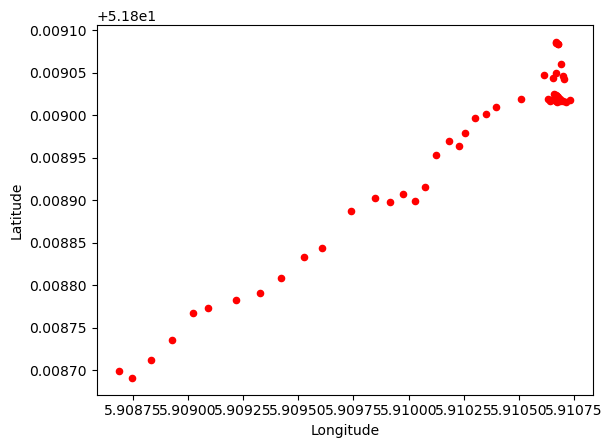

In [25]:
# result.head()
# result = result.loc[100:150]
result.loc[0:50].plot(kind='scatter',x='Longitude',y='Latitude',color='red')
result.head()

In [22]:
result['epoch'] = result['epoch']-result.epoch[0]
result['epoch'] = result['epoch']*10
x = result['epoch'].values.tolist()
y = result['Longitude'].values.tolist()
z = result['Latitude'].values.tolist()

new_x = list(range(0, (len(result)+1)*10))
new_y = np.interp(new_x, x, y)
new_z = np.interp(new_x, x, z)
dict = {'epoch': new_x, 'Longitude': new_y, 'Latitude': new_z} 
    
result_interpolated = pd.DataFrame(dict)
#result_interpolated.head(50)
result_interpolated['epoch'] = result_interpolated['epoch']/10

In [23]:
result_interpolated['direction'] = 0
result_interpolated['angle'] = 0
direction = 0
anglevar = 0
for i in range (2, len(result_interpolated)):
    Xa = result_interpolated.Longitude[i-1]-result_interpolated.Longitude[i]
    Ya = result_interpolated.Latitude[i-1]-result_interpolated.Latitude[i]
    Xb = result_interpolated.Longitude[i-2]-result_interpolated.Longitude[i-1]
    Yb = result_interpolated.Latitude[i-2]-result_interpolated.Latitude[i-1]
    high = (Xa*Xb+Ya*Yb)
    low = math.sqrt(pow(Xa, 2)+pow(Ya, 2))*math.sqrt(pow(Xb, 2)+pow(Yb, 2))
    angle = high/low

    if (angle<=1 and angle>=-1):
        anglevar = math.acos(angle)
        result_interpolated.angle[i] = anglevar
        
        direction = math.sin(Xa*Yb - Ya*Xb)
        
#     result.wedge[i] = direction
    if (direction < -0.0000 and anglevar > 0.05):
        result_interpolated.direction[i] = 'Left'
    if (direction > 0.0000 and anglevar > 0.05):
        result_interpolated.direction[i] = 'Right'    
    if (anglevar <=0.05 and anglevar > 0):
        result_interpolated.direction[i] = 'Neutral'
    if (anglevar < 0000000.1):
        result_interpolated.direction[i] = result_interpolated.direction[i-1]
#THis is not working, and placing values here when it shouldnt
    if (result_interpolated.direction[i] == 0):
        result_interpolated.direction[i] = 'Neutral'
#There is a second in between every measurement (roughly), sometimes 2 seconds

C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\2091290527.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_interpolated.angle[i] = anglevar
C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\2091290527.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_interpolated.direction[i] = result_interpolated.direction[i-1]
C:\Users\maasg\AppData\Local\Temp\ipykernel_27384\2091290527.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [24]:
result_interpolated.head(50)

,epoch,Longitude,Latitude,direction,angle
0,0.0,5.910668,51.809086,0,0.000000e+00
1,0.1,5.910668,51.809086,0,0.000000e+00
2,0.2,5.910668,51.809086,Neutral,0.000000e+00
3,0.3,5.910668,51.809086,Neutral,0.000000e+00
4,0.4,5.910668,51.809086,Neutral,0.000000e+00
5,0.5,5.910668,51.809086,Neutral,0.000000e+00
6,0.6,5.910668,51.809085,Neutral,0.000000e+00
7,0.7,5.910668,51.809085,Neutral,0.000000e+00
8,0.8,5.910668,51.809085,Neutral,0.000000e+00
9,0.9,5.910668,51.809085,Neutral,0.000000e+00


In [9]:
# result_interpolated.loc[0:50].plot(kind='scatter',x='Longitude',y='Latitude',color='red')
output = result_interpolated['direction'].values.tolist()

with open(r'output.txt', 'w') as fp:
    for item in output:
        # write each item on a new line
        fp.write("%s," % item)
    print('Done')

Done
